# Исследование сервиса аренды самокатов "GoFast"

## Описание проекта

Нам передали данные о некоторых пользователях из нескольких городов популярного сервиса аренды самокатов 'GoFast', а также об их поездках. Требуется проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса 'GoFast' пользуются мобильным приложением.

Сервисом можно пользоваться:
* без подписки 
    абонентская плата отсутствует;
    стоимость одной минуты поездки — 8 рублей;
    стоимость старта (начала поездки) — 50 рублей;

* с подпиской Ultra 
    абонентская плата — 199 рублей в месяц;
    стоимость одной минуты поездки — 6 рублей;
    стоимость старта — бесплатно.

## Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.

#### Пользователи — users_go.csv

* user_id - уникальный идентификатор пользователя;
* name - имя пользователя;
* age - возраст;
* city - город;
* subscription_type - тип подписки (free, ultra).

#### Поездки — rides_go.csv

* user_id - уникальный идентификатор пользователя;
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах);
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
* date - дата совершения поездки.

#### Подписки — subscriptions_go.csv

* subscription_type	- тип подписки;
* minute_price	- стоимость одной минуты поездки по данной подписке;
* start_ride_price	- стоимость начала поездки;
* subscription_fee	- стоимость ежемесячного платежа.


## Задачи исследования

### Этап 1. Загрузка и изучение данных
* 1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы.
* 1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

### Этап 2. Предобработка данных

* 2.1 Приведите столбец date к типу даты pandas
* 2.2 Создайте новый столбец с номером месяца на основе столбца date.
* 2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

### Этап 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:
* 3.1 частота встречаемости городов;
* 3.2 соотношение пользователей с подпиской и без подписки
* 3.3 возраст пользователей;
* 3.4 расстояние, которое пользователь преодолел за одну поездку;
* 3.5 продолжительность поездок.

### Этап 4. Объединение данных

* 4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge();
* 4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
    * c данными о пользователях без подписки;
    * с данными о пользователях с подпиской.
* 4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

### Этап 5. Подсчёт выручки

* 5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц;
* 5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

### Этап 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
* 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки;
* 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы;
* 6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод;
* 6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

## Этап 1: Загрузка данных 
#### Подключение библиотек


In [181]:
#импорт необходимых библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from scipy import stats
import seaborn as sns
import warnings


#### Загрузка данных из файла

In [138]:
try:
    df_users_go = pd.read_csv('/datasets/users_go.csv', sep = ',')
    df_rides_go = pd.read_csv('/datasets/rides_go.csv', sep = ',')
    df_subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv', sep = ',')
except Exception:
    df_users_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv', sep = ',')
    df_rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', sep = ',')
    df_subscriptions_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv', sep = ',')


In [139]:
df_users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [140]:
df_users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Данные, котороые хранятся в этом датафрейме 
* `user_id` - уникальный идентификатор пользователя;
* `name` - имя пользователя;
* `age` - возраст;
* `city` - город;
* `subscription_type` - тип подписки (free, ultra)

In [141]:
df_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [142]:
df_rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Данные, которые хранятся в этом датафрейме 
* `user_id` - уникальный идентификатор пользователя;
* `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах);
* `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
* `date` - дата совершения поездки.

In [143]:
df_subscriptions_go.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [144]:
df_subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Данные, которые хранятся в этом датафрейме 
* `subscription_type`	- тип подписки;
* `minute_price`	- стоимость одной минуты поездки по данной подписке;
* `start_ride_price`	- стоимость начала поездки;
* `subscription_fee`	- стоимость ежемесячного платежа.

### Вывод:
- В нашем распоряжении 3 датафрейма. С информацией о пользователях, их поездках и типе подписке 
- В датафрейме есть некорректный тип данных, необходимо исправить
-  Проверить наличие пропусков и дубликатов 

#### Шаг 2. Предобработка данных

### Изменение типа данных

In [145]:
df_rides_go['date'] = pd.to_datetime(df_rides_go['date'])
df_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Создание столбца на основе нового типа данных

In [146]:
df_rides_go['month'] = df_rides_go['date'].dt.month
df_rides_go.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Проверка дубликатов

In [147]:
print(f'количество дубликатов в датафрейме df_users_go: {df_users_go.duplicated().sum()}')
print(f'количество дубликатов в датафрейме df_rides_go: {df_rides_go.duplicated().sum()}')
print(f'количество дубликатов в датафрейме df_subscriptions_go: {df_subscriptions_go.duplicated().sum()}')

количество дубликатов в датафрейме df_users_go: 31
количество дубликатов в датафрейме df_rides_go: 0
количество дубликатов в датафрейме df_subscriptions_go: 0


Удалим дубликаты из датафрейма `df_users_go`

In [148]:
df_users_go.drop_duplicates(inplace=True)

In [149]:
print(f'количество дубликатов в датафрейме df_users_go: {df_users_go.duplicated().sum()}')

количество дубликатов в датафрейме df_users_go: 0


### Удаление пропусков

In [150]:
print(f'Пропущенные значения в df_users_go:\n{df_users_go.isnull().sum().sort_values()}')
print()
print(f'Пропущенные значения в df_rides_go:\n{df_rides_go.isnull().sum().sort_values()}')
print()
print(f'Пропущенные значения в df_subscriptions_go:\n{df_subscriptions_go.isnull().sum().sort_values()}')



Пропущенные значения в df_users_go:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропущенные значения в df_rides_go:
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Пропущенные значения в df_subscriptions_go:
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


### Вывод
- Пропуски не обнаружены 
- В датафрейме `df_users_go` удалили дублкаты 
- В датафрейме `df_rides_go` поменяли тип данных в столбце `date` и создали на его основе столбец с месяцами

## Шаг 3. Исследовательский анализ данных

### Частота встречаемости городов

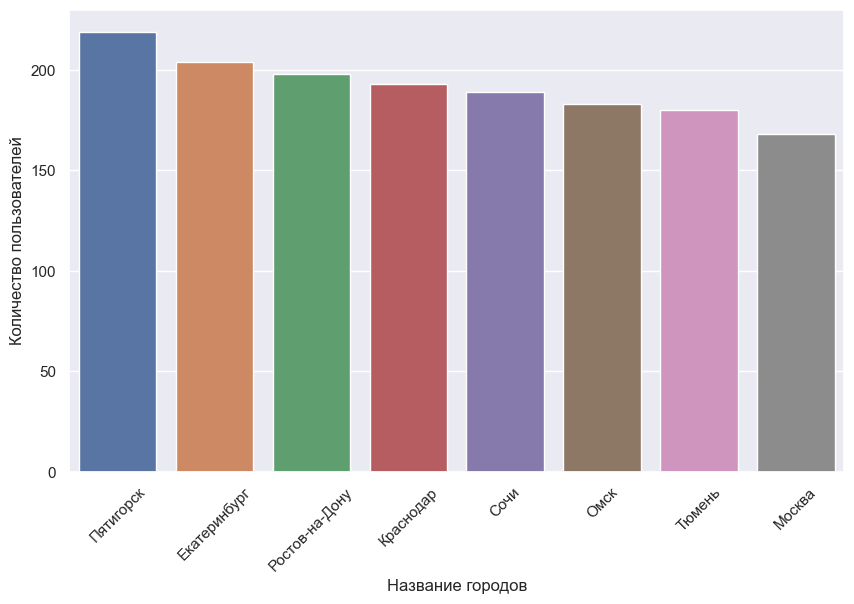

In [151]:
plt.figure(figsize=(10, 6))
city_count = df_users_go['city'].value_counts()
df_city_count = city_count.reset_index()
df_city_count.columns = ['city', 'count']
sns.barplot(x = 'city', y = 'count', data = df_city_count)
plt.xticks(rotation=45)
plt.xlabel('Название городов')
plt.ylabel('Количество пользователей')

plt.show()


Наибольшее количество пользователей в городе Пятигорск, больше 200. Наименьшее количество в Москве, чуть больше 150. 

### Соотношение пользователей с подпиской и без подписки

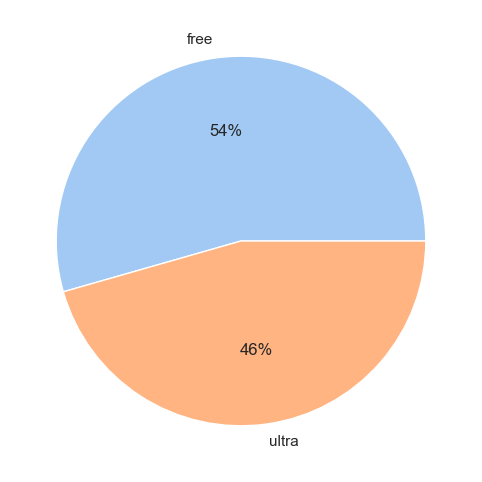

In [152]:
subscription_count = df_users_go['subscription_type'].value_counts()
df_subscription_count = subscription_count.reset_index()
df_subscription_count.columns = ['sub', 'count']
colors = sns.color_palette('pastel')[ 0:5 ]
plt.figure(figsize=(10, 6))
plt.pie(df_subscription_count['count'], labels=df_subscription_count['sub'], colors = colors, autopct='%.0f%%')
plt.show()



Количество пользователей с подпиской и без подписки примерно одинаковое, но пользователей без подписки немного больше. Количество пользователей с подпиской 46%, а без подписки 54%. 

###  Возраст пользователей

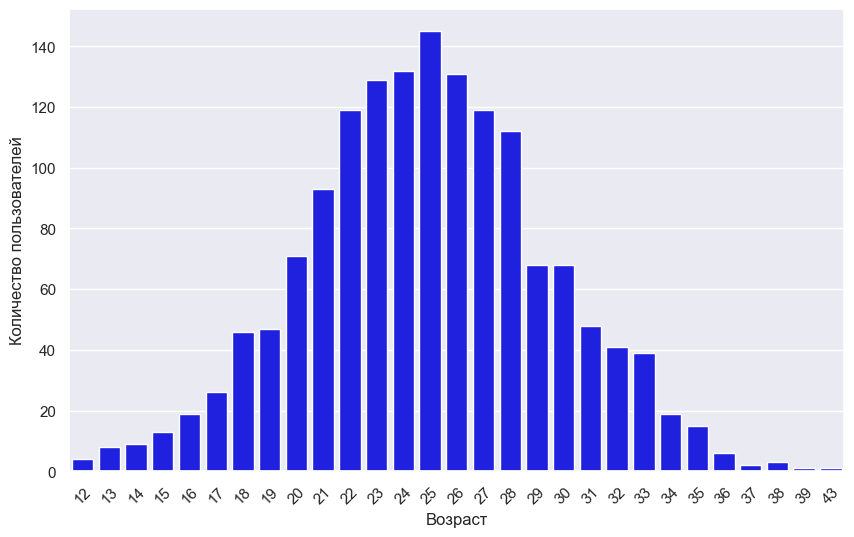

In [153]:
plt.figure(figsize=(10, 6))
age_users = df_users_go['age'].value_counts()
df_age_users = age_users.reset_index()
df_age_users.columns = ['age', 'count']
sns.barplot(x = 'age', y = 'count', data = df_age_users, color = 'blue')
plt.xticks(rotation=45)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

plt.show()

В возрасте пользователей замечено нормальное распределение. Больше всего пользователей в возрасте 25 лет. Справа и слева от этого возраста количество пользователей плавно уменьшается. Левая сторона колокола заканчививается 12 годами, таких пользователей меньше 20. А правая сторона колокола заканчивается 43 годами. Таких пользователей тоже меньше 20 человек. Вероятно это связано с тем, что подросткам не разрешают пользоваться самокатами родители, так как это травмоопасно. А более старшее поколение также боится получению травм

 ### Расстояние, которое пользователь преодолел за поездку 

In [194]:
df_rides_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

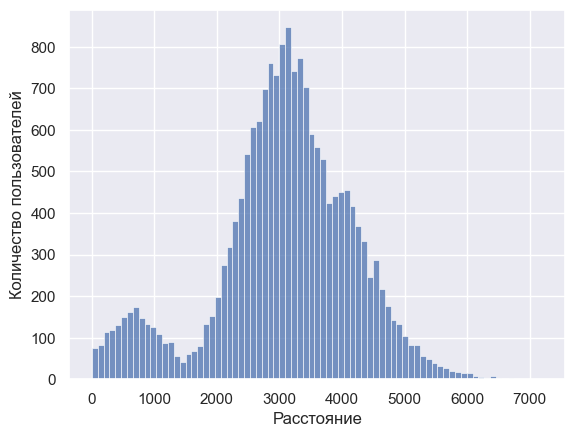

In [204]:
sns.set(style="darkgrid")
sns.histplot(data=df_rides_go, x='distance')
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.show()
None

Среднее значение дистанции составляет около 3070,66. Это означает, что в среднем каждый пользователь преодолевает примерно 3070,66 метров на самокате.

Стандартное отклонение равно 1116,83. В нашем случае, стандартное отклонение указывает на большой разброс о дистанциях, которые пользователи преодолевают на самокате.

Минимальное значение дистанции составляет 0,855683, что указывает на случаи, когда пользователь почти не преодолевал расстояние на самокате.

Медиана (50-й процентиль) равна 3133,61. Это значение показывает, что 50% пользователей преодолели меньше 3133,61 метров, а остальные 50% преодолели больше этой дистанции.

Первый и третий квартили (25-й и 75-й процентили) равны соответственно 2543,23 и 3776,22. Это значения, которые показывают, что 25% пользователей преодолели менее 2543,23 метров, а 25% пользователей преодолели более 3776,22 метров.

Максимальное значение дистанции равно 7211,01, что указывает на случаи, когда пользователь преодолел наибольшую дистанцию на самокате. 

 ### Продолжительность поездки

In [206]:
df_rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

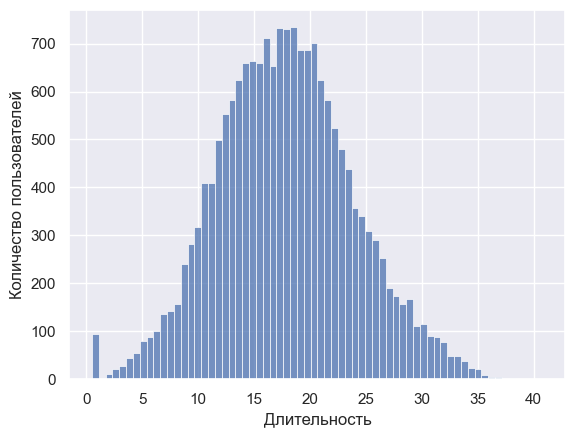

In [205]:
sns.set(style="darkgrid")
sns.histplot(data=df_rides_go, x='duration')
plt.xlabel('Длительность')
plt.ylabel('Количество пользователей')
plt.show()
None

Среднее значение дистанции составляет около 17 минут. Это означает, что в среднем длительность каждой поездки в среднем составляет 17 минут. 

Стандартное отклонение равно 6 мину. В нашем случае, стандартное отклонение не очень большое. 

Минимальное значение времени поездки составляет 0,5 минут, что указывает на случаи, когда пользователь почти сразу решил не использовать самокат. 

Медиана (50-й процентиль) равна 17 минутам. Это значение показывает, что 50% пользователей катались на самокате больше 17 минут, а остальные больше. 

Первый и третий квартили (25-й и 75-й процентили) равны соответственно 13 и 21. Это значения, которые показывают, что 25% пользователей использовали самокат менее 13 минут, а 25% пользователей преодолели более 21 минуты.

Максимальное значение дистанции равно 40 минутам, что указывает на случаи, когда пользователи пользовались самокатом больше всего. 

### Вывод 
- Больше весго пользователей в Пятигорске и меньше всего в Москве 
- Людей с подпиской и без подписки примерно одинакове количество 
- Средний возраст пользователей самокатов 25 лет. Минимальный возраст 12 лет, а максимальный 40. Распределение нормальное 
- В среднем пользователи преодолевают расстояние в 3км на самокате, а по длительности это занимает 17 минут. 

## Шаг 4. Объединение данных

### Объединие данных о пользователях, поездках и подписках в один датафрейм

In [156]:
#объединяем последовательно. Сначала датафреймы о пользователях и поездках по общему столбцу
#потом добавляем информацию о подписках по общему столбцу 
df_total = pd.merge(df_users_go, df_rides_go, on='user_id')
df_total = pd.merge(df_total, df_subscriptions_go, on='subscription_type')
df_total.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


### Создание еще 2х датафреймов: c данными о пользователях без подписки и с подпиской

In [157]:
df_users_without_subscription = df_total[df_total['subscription_type'] == 'free']
df_users_with_subscription = df_total[df_total['subscription_type'] == 'ultra']


In [158]:
df_users_without_subscription.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [159]:
df_users_with_subscription.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


### Визуализация данных о пользоватехя с подпиской и без

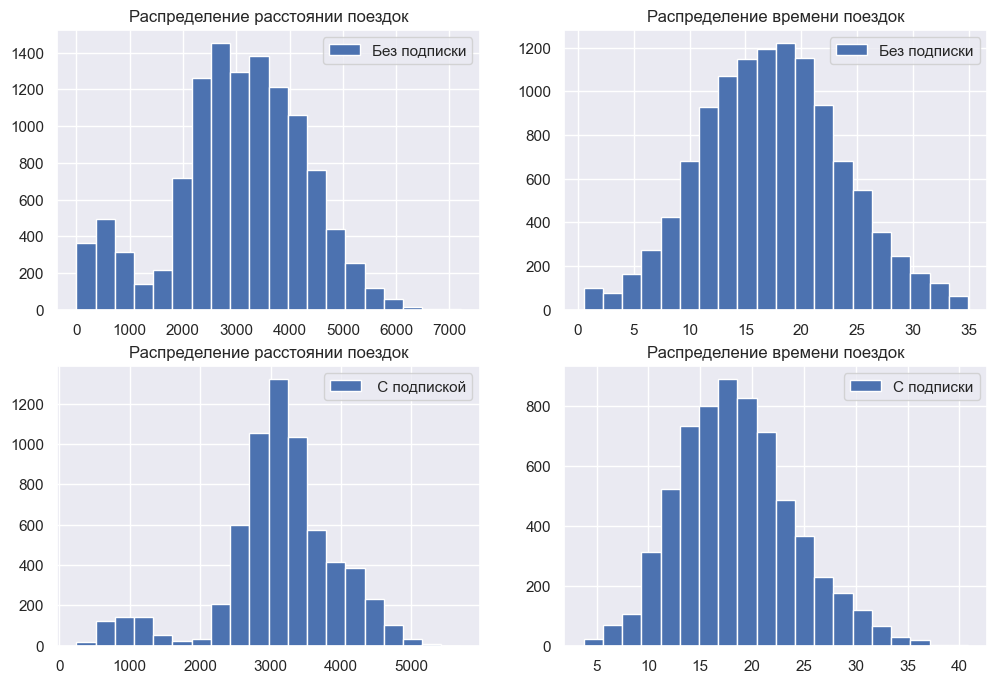

In [207]:
sns.set(style="darkgrid")
#задаем поле для отображения 4х графиков
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
#делаем массив одномерным для удобства
axes = axes.flatten()
#размещаем графики
axes[0].hist(df_users_without_subscription['distance'], bins=20, label='Без подписки')
axes[2].hist(df_users_with_subscription['distance'], bins=20, label=' C подпиской')
axes[1].hist(df_users_without_subscription['duration'], bins=20, label='Без подписки')
axes[3].hist(df_users_with_subscription['duration'], bins=20, label='С подписки')

#задааем легенду
for i in range(0, 4):
    axes[i].legend()
    if i % 2 == 0:
        axes[i].set_title('Распределение расстоянии поездок')
    else:
        axes[i].set_title('Распределение времени поездок')


plt.show()

In [161]:

df_distance = pd.DataFrame({'Без подписки': df_users_without_subscription['distance'].describe(),
                       'С подпиской': df_users_with_subscription['distance'].describe()})

df_duration = pd.DataFrame({'Без подписки': df_users_without_subscription['duration'].describe(),
                       'С подпиской': df_users_with_subscription['duration'].describe()})

print("Расстояние")
print(df_distance)
print()
print("Время")
print(df_duration)

Расстояние
       Без подписки  С подпиской
count  11568.000000  6500.000000
mean    3045.495282  3115.445388
std     1246.173806   836.895330
min        0.855683   244.210438
25%     2366.562689  2785.444017
50%     3114.648465  3148.637229
75%     3905.697894  3560.574425
max     7211.007745  5699.769662

Время
       Без подписки  С подпиской
count  11568.000000  6500.000000
mean      17.390909    18.541985
std        6.326803     5.572048
min        0.500000     3.760353
25%       12.958437    14.524654
50%       17.326890    18.178153
75%       21.594071    21.884129
max       34.948498    40.823963


Среднее значение расстояния без подписки составляет около 3045,5 метров, в то время как среднее значение расстояния с подпиской составляет около 3115,4 метров. Следовательно, в среднем пользователи с подпиской преодолевают немного большую дистанцию на самокате, чем пользователи без подписки.

Стандартное отклонение для расстояния без подписки составляет около 1246,2, в то время как для расстояния с подпиской составляет около 836,9. Это указывает на больший разброс значений для расстояния без подписки по сравнению с расстоянием с подпиской.

Минимальное значение расстояния без подписки составляет 0,855683, в то время как для расстояния с подпиской составляет 244,21. Это означает, что есть случаи, когда пользователи без подписки почти не преодолевали расстояние на самокате, в то время как пользователи с подпиской обычно преодолевали более значительные дистанции.


## Шаг 5. Подсчёт выручки

5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.


In [162]:
df_aggregated = df_total.groupby(['name', 'month']).agg({'distance': 'sum', 'duration': 'sum', 'user_id': 'count'}).reset_index()
df_aggregated.rename(columns={'user_id': 'trip_count'}, inplace=True)
df_aggregated.head(20)


,name,month,distance,duration,trip_count
0,Агата,1,21576.313262,155.770446,7
1,Агата,2,16813.641401,91.908572,6
2,Агата,3,20222.499758,128.227645,6
3,Агата,4,24862.216384,154.473980,9
4,Агата,5,30862.175755,180.231405,9
5,Агата,6,15737.900937,93.800826,5
6,Агата,7,10305.246884,53.350690,4
7,Агата,8,9975.886133,65.552467,3
8,Агата,9,23999.844445,149.574527,8
9,Агата,10,29968.347417,183.776156,9


5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа

Еще раз взглянем на датафрейм 

In [163]:
df_total.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [164]:
df_total['rounded_duration'] = np.ceil(df_total['duration']) 
df_total.loc[df_total['subscription_type'] == 'ultra', 'revenue'] = (
    df_total['rounded_duration'] * df_total['minute_price'] +
    df_total['start_ride_price'] +
    df_total['subscription_fee']
)

df_total.loc[df_total['subscription_type'] == 'free', 'revenue'] = (
    df_total['rounded_duration'] * df_total['minute_price'] +
    df_total['start_ride_price'] 
)

df_revenue_aggregated = df_total.groupby(['name', 'month']).agg({'revenue': 'sum'}).reset_index()

df_aggregated_with_revenue = pd.merge(df_aggregated, df_revenue_aggregated, on=['name', 'month'])

df_aggregated_with_revenue.head()

,name,month,distance,duration,trip_count,revenue
0,Агата,1,21576.313262,155.770446,7,2353.0
1,Агата,2,16813.641401,91.908572,6,1526.0
2,Агата,3,20222.499758,128.227645,6,1974.0
3,Агата,4,24862.216384,154.473980,9,2630.0
4,Агата,5,30862.175755,180.231405,9,2895.0


#### Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой 

Для проверки гипотезы можно использовать двухвыборочный t-тест для независимых выборок из библиотеки scipy.stats. 

H0: Среднее время поездки для пользователей с подпиской равно среднему времени для пользователей без подписки
H1: Среднее время поездки для пользователей с подпиской отличается от среднего времени для пользователей без подписки
Уровень статистической значимости: 0.05 

In [165]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
 12  rounded_duration   18068 non-null  float64       
 13  revenue            18068 non-null  float64       
dtypes: dat

In [186]:
users_with_subscription = df_total[df_total['subscription_type'] == 'ultra']['duration']
users_without_subscription = df_total[df_total['subscription_type'] == 'free']['duration']
alpha = 0.05 
results = stats.ttest_ind(users_with_subscription, users_without_subscription, alternative='greater')
print(results.pvalue)
if results.pvalue < alpha:
    print('Можем отвергнуть нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')


1.2804098316645618e-34
Можем отвергнуть нулевую гипотезу


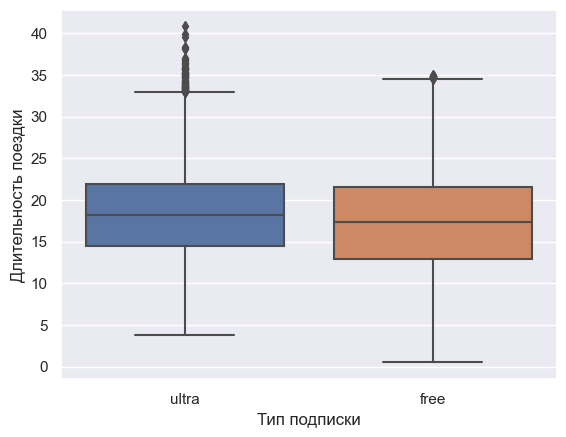

In [169]:
sns.boxplot(x=df_total['subscription_type'], y=df_total['duration'])
plt.xlabel('Тип подписки')
plt.ylabel('Длительность поездки')
plt.show()

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Гипотезу можно проверить одновыборочный t-тестом
- H0 (нулевая гипотеза): Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров;
- H1 (альтернативная гипотеза): Расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

In [185]:
duration = 3130
alpha = 0.05 
subscribed_users = df_total[df_total['subscription_type'] == 'ultra']['distance']
results = stats.ttest_1samp(subscribed_users, duration)
print(results.pvalue)
if results.pvalue < alpha:
    print('Можем отвергнуть нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

0.16092623043004292
Не можем отвергнуть нулевую гипотезу


 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.


- H0 (нулевая гипотеза): Помесячная выручка от пользователей с подпиской и без подписки одинакова;
- H1 (альтернативная гипотеза): Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.


In [175]:
df_users_with_subscription.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


In [176]:
df_users_without_subscription.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [184]:
df_users_with_subscription['total_revenue'] = (
    df_users_with_subscription['duration'] * df_users_with_subscription['minute_price'] +
    df_users_with_subscription['start_ride_price'] + df_users_with_subscription['subscription_fee']
)

df_users_without_subscription['total_revenue'] = (
    df_users_without_subscription['duration'] * df_users_without_subscription['minute_price'] +
    df_users_without_subscription['start_ride_price'] + df_users_without_subscription['subscription_fee']
)

df_users_with_subscription_monthly_revenue = (df_users_with_subscription
                                              .groupby('month')['total_revenue'].sum()
                                              )

df_users_without_subscription_monthly_revenue = (df_users_without_subscription
                                              .groupby('month')['total_revenue'].sum()
                                              )

results = stats.ttest_ind(df_users_with_subscription_monthly_revenue, df_users_without_subscription_monthly_revenue)
warnings.filterwarnings("ignore")
print(f'Знчение p-value {results.pvalue}')

if results.pvalue < alpha:
    print('Можем отвергнуть нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

Знчение p-value 0.00218544990283426
Можем отвергнуть нулевую гипотезу


#### Шаг 7. Распределения